In [1]:
import os
import csv

In [2]:
def addrPath(tweeter):
    path=addrRoot+str(tweeter)+'/可视化分析结果/'
    if os.path.exists(path) is False:
         os.makedirs(path)
    return path

In [103]:
def addrFile(tweeter,suffix):
    path=addrRoot+str(tweeter)+'/'
    if os.path.exists(path) is False:
         os.makedirs(path)
    address=path+tweeter+suffix
    return address  

In [4]:
import random

#for item in dataDict:
    #print(dataDict.get(item)[-1-sort[-1]])
    #print(item)
def randomText(no):
    
        item=random.choice(list(dataDict))
        return (item+':'+str(dataDict.get(item)[no]))

def exactText(no,item):
    text=(item+':'+str(dataDict.get(item)[no]))
    print(text)
    return text


In [5]:
#文件保存地址，改为你存放csv文件的完整地址
addrRoot='C:/Users/cascara/Desktop/seedcup/csv/blog/fans/'

#是否调试
isDebug=False

#100万+显示
infinity=1000000

In [116]:
tweeter=input('输入博主姓名：')#'陈赫'

输入博主姓名： 陈赫


In [117]:
#开始
startCollect=True


batch=0
dataDict={}
Title=[]
while(1):
    titleEixst=True
    address=addrFile(tweeter,'batch'+str(batch)+'.csv')    
    print(address)
    
    if os.path.exists(address) is True:
        fp = open(address,'r',newline='',encoding='utf-16')      
        reader=csv.reader(fp)
        for line in reader:
            if titleEixst is True:
                #将标题制成各个
                if startCollect is True:
                    for item in line:
                        #print(item[-1])
                        if isDebug is True:
                            print(item)

                            
                        dataDict[item]=[]
                    startCollect=False
                Title=line    
                if isDebug is True:
                    print(line)
                titleEixst=False
            else:
                for no in range(len(line)):               
                    if(Title[no].find('count')>=0):
                        if line[no].find('0万') > 0:
                            dataDict.get(Title[no]).append(infinity)
                        else:
                            dataDict.get(Title[no]).append(eval(line[no]))
                        
                        #dataDict.get(Title[no]).append((line[no]))
                        
                    else:
                        dataDict.get(Title[no]).append((line[no]))
                    if isDebug is True:
                        print(Title[no])
                        print(line[no])               
                
    
    else:
        print('不存在'+address)
        break
    fp.close()
    batch+=1
#print(dataDict)

C:/Users/cascara/Desktop/seedcup/csv/blog/fans/陈赫/陈赫batch0.csv
C:/Users/cascara/Desktop/seedcup/csv/blog/fans/陈赫/陈赫batch1.csv
不存在C:/Users/cascara/Desktop/seedcup/csv/blog/fans/陈赫/陈赫batch1.csv


In [118]:
print(Title)

['id', 'screen_name', 'description', 'gender', 'followers_count', 'follow_count', '性别', '所在地', '公司', '大学']


### 读入数据

In [119]:

sites=dataDict['所在地']

In [120]:
countSite={}
for site in sites:
    if site.find(' ')> 0:
        #print(item)
        province=site.split(' ')[0]
        city=site.split(' ')[-1]
    site=province
    #print(site)
    if countSite.get(site) is None:
        countSite[site]=1
    else:
        countSite[site]+=1
print(countSite)
validSites=[]
for site in countSite:
        if site not in ['其他','未知','海外']:
            validSites.append([site,countSite[site]])
 #[(list((item,countSite[item]))) for item in countSite]
print(validSites)
min_data=min([d[1] for d in validSites])
max_data=max([d[1] for d in validSites])

{'湖南': 3, '北京': 98, '浙江': 9, '上海': 19, '台湾': 22, '四川': 6, '广东': 15, '海外': 4, '香港': 1, '吉林': 1, '辽宁': 1}
[['湖南', 3], ['北京', 98], ['浙江', 9], ['上海', 19], ['台湾', 22], ['四川', 6], ['广东', 15], ['香港', 1], ['吉林', 1], ['辽宁', 1]]


In [150]:
choice='散点'

In [152]:
from pyecharts import options as opts
from pyecharts.charts import Geo, Page, Bar ,Graph
from pyecharts.faker import Collector, Faker
from pyecharts.globals import CurrentConfig,NotebookType,ChartType, SymbolType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

from pyecharts.render import make_snapshot
from snapshot_phantomjs import snapshot

if choice=='热力':
    title=tweeter+'粉丝地区分布热力图'
    type=ChartType.HEATMAP
else:
    title=tweeter+'粉丝地区分布散点图'
    type=ChartType.EFFECT_SCATTER



def geo_heatmap() -> Geo:
    c = (
        Geo()
        .add_schema(
            maptype="china",
            itemstyle_opts=opts.ItemStyleOpts(color="#323c48", border_color="#111"),
        )
        .add(
            "",
           validSites,
            #[list(z) for z in zip(Faker.provinces, Faker.values())],
            
            type_=type,
            label_opts=opts.LabelOpts(is_show=False),
            #type_=,
            #color="white",
            
           
        )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(
            min_=min_data,
            max_=max_data,
      
            
            ),            
            title_opts=opts.TitleOpts(title=title),
        )
    )
    return c

In [153]:
def get_year_chart():    
    map_chart = (
        Map()
        .add(
            series_name="",
            data_pair=validSites,
            label_opts=opts.LabelOpts(is_show=False),
            is_map_symbol_show=False,
            itemstyle_opts={
                "normal": {"areaColor": "#323c48", "borderColor": "#404a59"},
                "emphasis": {
                    "label": {"show": Timeline},
                    "areaColor": "rgba(255,255,255, 0.5)",
                },
            },
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="1980年以来中国各省GDP排名变化情况",
                subtitle="GDP单位:亿元",
                pos_left="center",
                pos_top="top",
                title_textstyle_opts=opts.TextStyleOpts(
                    font_size=25, color="rgba(255,255,255, 0.9)"
                ),
            ),
            tooltip_opts=opts.TooltipOpts(
                is_show=True,
                formatter=JsCode(
                    """function(params) {
                    if ('value' in params.data) {
                        return params.data.value[2] + ': ' + params.data.value[0];
                    }
                }"""
                ),
            ),
            visualmap_opts=opts.VisualMapOpts(
                is_calculable=True,
                dimension=0,
                pos_left="10",
                pos_top="center",
                range_text=["High", "Low"],
                range_color=["lightskyblue", "yellow", "orangered"],
                textstyle_opts=opts.TextStyleOpts(color="#ddd"),
                min_=min_data,
                max_=max_data,
            ),
        )
    )
    return map_chart

In [154]:
c=geo_heatmap()#get_year_chart()


In [155]:
c.load_javascript()

In [157]:
c.render_notebook()

In [ ]:
address=addrFile(tweeter,title+'.png')    
make_snapshot(snapshot, c.render(), address)

In [62]:
import pyecharts.options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Timeline, Grid, Bar, Map, Pie

"""
Gallery 使用 pyecharts 1.0.0
参考地址: https://gallery.echartsjs.com/editor.html?c=xSkGI6zLmb

目前无法实现的功能:

1、
"""

data = [
    {
        "time": 1980,
        "data": [
            {"name": "台湾", "value": [633.76, 12.28, "台湾"]},
            {"name": "香港", "value": [432.47, 8.38, "香港"]},
            {"name": "江苏", "value": [319.8, 6.2, "江苏"]},
            {"name": "上海", "value": [311.89, 6.05, "上海"]},
            {"name": "山东", "value": [292.13, 5.66, "山东"]},
            {"name": "辽宁", "value": [281, 5.45, "辽宁"]},
            {"name": "广东", "value": [249.65, 4.84, "广东"]},
            {"name": "四川", "value": [229.31, 4.44, "四川"]},
            {"name": "河南", "value": [229.16, 4.44, "河南"]},
            {"name": "黑龙江", "value": [221, 4.28, "黑龙江"]},
        ],
    },
    {
        "time": 2000,
        "data": [
            {"name": "台湾", "value": [27435.15, 19.47, "台湾"]},
            {"name": "香港", "value": [14201.59, 10.08, "香港"]},
            {"name": "广东", "value": [10741.25, 7.62, "广东"]},
            {"name": "江苏", "value": [8553.69, 6.07, "江苏"]},
            {"name": "山东", "value": [8337.47, 5.92, "山东"]},
            {"name": "浙江", "value": [6141.03, 4.36, "浙江"]},
            {"name": "河南", "value": [5052.99, 3.59, "河南"]},
            {"name": "河北", "value": [5043.96, 3.58, "河北"]},
            {"name": "上海", "value": [4771.17, 3.39, "上海"]},
            {"name": "辽宁", "value": [4669.1, 3.31, "辽宁"]},
        ],
    },
    {
        "time": 2005,
        "data": [
            {"name": "台湾", "value": [30792.89, 12.52, "台湾"]},
            {"name": "广东", "value": [22527.37, 9.16, "广东"]},
            {"name": "江苏", "value": [18598.69, 7.56, "江苏"]},
            {"name": "山东", "value": [18366.87, 7.47, "山东"]},
            {"name": "香港", "value": [14869.68, 6.05, "香港"]},
            {"name": "浙江", "value": [13417.68, 5.46, "浙江"]},
            {"name": "河南", "value": [10587.42, 4.3, "河南"]},
            {"name": "河北", "value": [10043.42, 4.08, "河北"]},
            {"name": "上海", "value": [9247.66, 3.76, "上海"]},
            {"name": "辽宁", "value": [8047.3, 3.27, "辽宁"]},
        ],
    },
    {
        "time": 2010,
        "data": [
            {"name": "广东", "value": [46036.25, 9.49, "广东"]},
            {"name": "江苏", "value": [41425.48, 8.54, "江苏"]},
            {"name": "山东", "value": [39169.92, 8.08, "山东"]},
            {"name": "台湾", "value": [30205.64, 6.23, "台湾"]},
            {"name": "浙江", "value": [27747.65, 5.72, "浙江"]},
            {"name": "河南", "value": [23092.36, 4.76, "河南"]},
            {"name": "河北", "value": [20394.26, 4.21, "河北"]},
            {"name": "辽宁", "value": [18457.3, 3.81, "辽宁"]},
            {"name": "四川", "value": [17185.48, 3.54, "四川"]},
            {"name": "上海", "value": [17165.98, 3.54, "上海"]},
        ],
    },
    {
        "time": 2015,
        "data": [
            {"name": "广东", "value": [72812.55, 9.35, "广东"]},
            {"name": "江苏", "value": [70116.38, 9, "江苏"]},
            {"name": "山东", "value": [63002.3, 8.09, "山东"]},
            {"name": "浙江", "value": [42886, 5.51, "浙江"]},
            {"name": "河南", "value": [37010.25, 4.75, "河南"]},
            {"name": "台湾", "value": [32604.52, 4.19, "台湾"]},
            {"name": "四川", "value": [30103.1, 3.87, "四川"]},
            {"name": "河北", "value": [29806.1, 3.83, "河北"]},
            {"name": "湖北", "value": [29550.19, 3.8, "湖北"]},
            {"name": "湖南", "value": [29047.2, 3.73, "湖南"]},
        ],
    },
]


def get_year_chart(year: int):
    map_data = [
        [[x["name"], x["value"]] for x in d["data"]] for d in data if d["time"] == year
    ][0]
    min_data, max_data = (
        min([d[1][0] for d in map_data]),
        max([d[1][0] for d in map_data]),
    )
    map_chart = (
        Map()
        .add(
            series_name="",
            data_pair=map_data,
            label_opts=opts.LabelOpts(is_show=False),
            is_map_symbol_show=False,
            itemstyle_opts={
                "normal": {"areaColor": "#323c48", "borderColor": "#404a59"},
                "emphasis": {
                    "label": {"show": Timeline},
                    "areaColor": "rgba(255,255,255, 0.5)",
                },
            },
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="1980年以来中国各省GDP排名变化情况",
                subtitle="GDP单位:亿元",
                pos_left="center",
                pos_top="top",
                title_textstyle_opts=opts.TextStyleOpts(
                    font_size=25, color="rgba(255,255,255, 0.9)"
                ),
            ),
            tooltip_opts=opts.TooltipOpts(
                is_show=True,
                formatter=JsCode(
                    """function(params) {
                    if ('value' in params.data) {
                        return params.data.value[2] + ': ' + params.data.value[0];
                    }
                }"""
                ),
            ),
            visualmap_opts=opts.VisualMapOpts(
                is_calculable=True,
                dimension=0,
                pos_left="10",
                pos_top="center",
                range_text=["High", "Low"],
                range_color=["lightskyblue", "yellow", "orangered"],
                textstyle_opts=opts.TextStyleOpts(color="#ddd"),
                min_=min_data,
                max_=max_data,
            ),
        )
    )

    bar_x_data = [x[0] for x in map_data]

    # 这里注释的部分会导致 label 和 value 与 饼图不一致
    # 使用下面的 List[Dict] 就可以解决这个问题了。
    # bar_y_data = [x[1][0] for x in map_data]
    bar_y_data = [{"name": x[0], "value": x[1][0]} for x in map_data]
    bar = (
        Bar()
        .add_xaxis(xaxis_data=bar_x_data)
        .add_yaxis(
            series_name="",
            yaxis_index=1,
            yaxis_data=bar_y_data,
            label_opts=opts.LabelOpts(
                is_show=True, position="right", formatter="{b}: {c}"
            ),
        )
        .reversal_axis()
        .set_global_opts(
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(is_show=False)),
            yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(is_show=False)),
            tooltip_opts=opts.TooltipOpts(is_show=False),
            visualmap_opts=opts.VisualMapOpts(
                is_calculable=True,
                dimension=0,
                pos_left="10",
                pos_top="center",
                range_text=["High", "Low"],
                range_color=["lightskyblue", "yellow", "orangered"],
                textstyle_opts=opts.TextStyleOpts(color="#ddd"),
                min_=min_data,
                max_=max_data,
            ),
        )
    )

    pie_data = [[x[0], x[1][0]] for x in map_data]
    percent_sum = sum([x[1][1] for x in map_data])
    rest_value = 0
    for d in map_data:
        rest_percent = 100.0
        rest_percent = rest_percent - percent_sum
        rest_value = d[1][0] * (rest_percent / d[1][1])
    pie_data.append(["其他省份", rest_value])
    pie = (
        Pie()
        .add(
            series_name="",
            data_pair=pie_data,
            radius=["12%", "20%"],
            center=["75%", "85%"],
            itemstyle_opts=opts.ItemStyleOpts(
                border_width=1, border_color="rgba(0,0,0,0.3)"
            ),
        )
        .set_global_opts(
            tooltip_opts=opts.TooltipOpts(is_show=True, formatter="{b} {d}%"),
            legend_opts=opts.LegendOpts(is_show=False),
        )
    )

    grid_chart = (
        Grid()
        .add(
            bar,
            grid_opts=opts.GridOpts(
                pos_left="10", pos_right="45%", pos_top="70%", pos_bottom="5"
            ),
        )
        .add(pie, grid_opts=opts.GridOpts())
        .add(map_chart, grid_opts=opts.GridOpts())
    )

    return grid_chart


# Draw Timeline
time_list = [1980, 2000, 2005, 2010, 2015]
timeline = Timeline(
    init_opts=opts.InitOpts(width="1200px", height="800px", theme=ThemeType.DARK)
)
for y in time_list:
    g = get_year_chart(year=y)
    timeline.add(g, time_point=str(y))

timeline.add_schema(
    orient="vertical",
    is_auto_play=True,
    is_inverse=True,
    play_interval=5000,
    pos_left="null",
    pos_right="5",
    pos_top="20",
    pos_bottom="20",
    width="50",
    label_opts=opts.LabelOpts(is_show=True, color="#fff"),
)

timeline.render("china_gdp_from_1980.html")

'C:\\Users\\cascara\\learngit\\gitskills\\fansMap\\china_gdp_from_1980.html'

c:\users\cascara\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


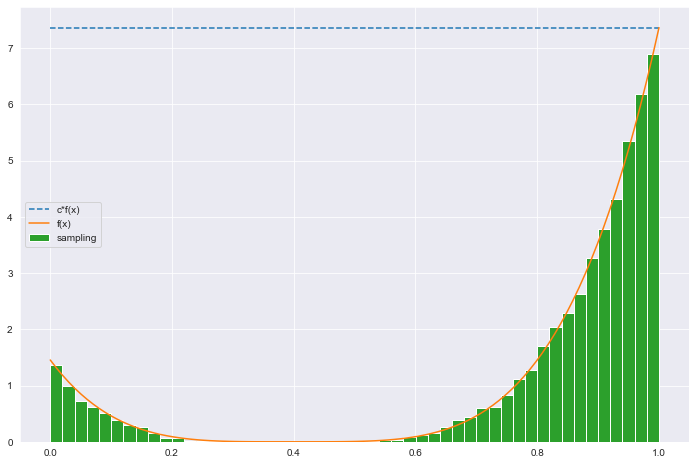

In [34]:
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)


def AceeptReject(split_val):
    global c
    global power
    while True:
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        if y*c <= math.pow(x - split_val, power):
            return x

power = 4
t = 0.4  
sum_ = (math.pow(1-t, power + 1) - math.pow(-t, power + 1)) / (power + 1)  #求积分
x = np.linspace(0, 1, 100)
#常数值c
c = 0.6**4/sum_
cc = [c for xi in x]
plt.plot(x, cc, '--',label='c*f(x)')
#目标概率密度函数的值f(x)
y = [math.pow(xi - t, power)/sum_ for xi in x]
plt.plot(x, y,label='f(x)')
#采样10000个点
samples = []
for  i in range(10000):
    samples.append(AceeptReject(t))
plt.hist(samples, bins=50, normed=True,label='sampling')
plt.legend()
plt.show()